# Tutorial3:

## Support Vector Classification
In this section, let’s understand how Support Vector Machines work and why they are so popular.

SVM’s are non-probabilistic classifiers that make them different from Logistic Regression and using Kernel Trick SVM’s can also model non-linear relationships which makes them incredibly powerful and a must in the arsenal.

![SVM](images/SVM.png "SVM")
  
Some of the keys concepts in the case of SVM’s are as follows,
  
##### Kernal Trick
The basic idea behind the kernel trick is to define higher dimension space using a function(kernel) to map the lower dimension non-separable space to a separable higher dimension.
The kernel used is of various types, some of the popular kernels are as follows,
- Sigmoid
- Radial Basis Function(RBF)
- Polynomial
  
Kernel Trick makes SVM’s very powerful especially in the case of non-linear relationships.
##### Support Vectors
The points closest to margin is known as support vector. It’s because of these two points the classification boundary is defined. The distance of these two points from the decision surface is known as **Margin**.

If a data point is not a Support Vector, removing it will have no impact on the Margin. However, removing a support vector will impact the decision boundary(Margin).

#### More Resources
- [Kernel – Basics](https://ocw.mit.edu/courses/sloan-school-of-management/15-097-prediction-machine-learning-and-statistics-spring-2012/lecture-notes/MIT15_097S12_lec13.pdf)
- [Kernel – Advanced](https://people.eecs.berkeley.edu/~jordan/kernels/0521813972c03_p47-84.pdf)
- [SVM – Paper](http://image.diku.dk/imagecanon/material/cortes_vapnik95.pdf)

## In this practice session, we will learn to code Support Vector Regressor. 
### We will perform the following steps to build a simple classifier using the popular Beer dataset.

 
 
  - **Data Preprocessing**

    - Importing the libraries.
    - Importing dataset.
    - Dealing with the categorical variable.
    - Classifying dependent and independent variables.
    - Splitting the data into a training set and test set.
    - Feature scaling.
 

  -  **Support Vector Regression**

    - Create a Support Vector Regression.
    - Feed the training data to the regression.
    - Predicting the score for the test set.
    - Using the rmse to calculate the performance.

In [1]:
import ipywidgets as widgets
from IPython.display import display

style = {'description_width': 'initial'}

In [2]:
#1 Importing essential libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Load the Dataset

In [3]:
#2 Importing the dataset
file_name = 'Datasets/beer_data.csv'
dataset = pd.read_csv(file_name)

In [4]:
#Displaying the dataset
dataset.head(8)

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5
5,58046,mikedrinksbeer2,4.5
6,58046,dbmernin83,4.0
7,58046,Blakaeris,4.5


### Handling Data

In [5]:
# Dealing with Categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#Making sure the type of the review_profilename column is str
dataset["review_profilename"] = dataset["review_profilename"].astype(str)
dataset["review_profilename"] = le.fit_transform(dataset["review_profilename"])
dataset.head()

,beer_beerid,review_profilename,review_overall
0,48215,20635,3.0
1,52159,18354,3.0
2,52159,9525,3.0
3,52159,19171,4.0
4,52159,6912,3.5


In [6]:
dataset.isnull().sum()

beer_beerid           0
review_profilename    0
review_overall        0
dtype: int64

##### If null values present u can handle them as follows

In [7]:
#you can use mean or median according to your needs
dataset['review_profilename'].fillna(dataset['review_profilename'].mean(), inplace=True)

In [8]:
print(f"Dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns.")

Dataset has 475984 rows and 3 columns.


In [9]:
#3 classify dependent and independent variables
X = dataset[[col for col in dataset.columns if col not in ('review_overall')]].values  #independent variables 
y = dataset['review_overall'].values  #dependent variable 

In [10]:
#4 Creating training set and testing set
from sklearn.model_selection import train_test_split
test_size = widgets.FloatSlider(min=0.01, max=0.6, value=0.2, description="Test Size :", tooltips=['Usually 20-30%'])
display(test_size)

FloatSlider(value=0.2, description='Test Size :', max=0.6, min=0.01)

In [11]:
#Divide the dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=test_size.value, random_state = 0) 

In [12]:
print("Training Set :\n----------------\n")
print("X = \n", X_train[:5])
print("y = \n", y_train[:5])

print("\n\nTest Set :\n----------------\n")
print("X = \n",X_test[:5])
print("y = \n", y_test[:5])

Training Set :
----------------

X = 
 [[ 2512  8970]
 [60420 13289]
 [ 1443 19400]
 [  836  5998]
 [12104 15292]]
y = 
 [4.5 3.5 4.5 4.  4. ]


Test Set :
----------------

X = 
 [[ 9873  7180]
 [42466 16724]
 [ 1119  4712]
 [38919 10641]
 [34832 17880]]
y = 
 [3.  3.5 2.5 2.5 5. ]


In [13]:
print(f"Shape of Training set is {X_train.shape}")
print(f"Shape of Testing set is {X_test.shape}")

Shape of Training set is (380787, 2)
Shape of Testing set is (95197, 2)


### Apply Support Vector Regression 

In [14]:
# import support vector library
from sklearn.svm import SVR

## Predict and Evaluate the Model

In [17]:
# Train the Regressor with training set
regressor = SVR(max_iter=500)

#fit the linear model
regressor.fit(X_train, y_train)

#7 predict the outcome of test sets
y_Pred = regressor.predict(X_test)
print("\nPredictions = ", y_Pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)



Predictions =  [2.52928975 2.55700081 2.52526691 ... 2.52488835 2.55990786 2.52487183]


In [18]:
# Calculating score from Root Mean Log Squared Error
def rmlse(y_test, y_pred):
    error = np.square(np.log10(y_pred +1) - np.log10(y_test +1)).mean() ** 0.5
    score = 1 - error
    return score

# Printing the score
print("\n----------------------------\nRMLSE Score = ", rmlse(y_test, y_Pred))

#9 Comparing Actual and Predicted Salaries for he test set
print("\nActual vs Predicted Scores \n------------------------------\n")
error_df = pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_Pred,
                         "Abs. Error" : np.abs(y_test - y_Pred)})

error_df


----------------------------
RMLSE Score =  0.851306003314169

Actual vs Predicted Scores 
------------------------------



,Actual,Predicted,Abs. Error
0,3.0,2.529290,0.470710
1,3.5,2.557001,0.942999
2,2.5,2.525267,0.025267
3,2.5,2.561139,0.061139
4,5.0,2.559189,2.440811
...,...,...,...
95192,3.0,2.525916,0.474084
95193,3.5,2.525344,0.974656
95194,4.0,2.524888,1.475112
95195,5.0,2.559908,2.440092


### Actual vs. Predicted 

No handles with labels found to put in legend.


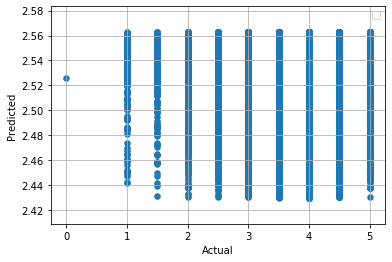

In [26]:
#Plotting Actual observation vs Predictions
plt.scatter(y_test,y_Pred, s = 30)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend();
plt.grid();
plt.show();

### Scores

In [38]:
#9 Calculating score from Root Mean Log Squared Error
from sklearn.metrics import r2_score
def rmlse(y_test, y_pred):
    error = np.square(np.log10(y_pred +1) - np.log10(y_test +1)).mean() ** 0.5
    score = 1-error
    return error, score

error, score = rmlse(y_test, y_Pred)

print("\n",'-'*40)
print("RMLSE : ", error)
print("Score :(least the better) ", score)


 ----------------------------------------
RMLSE :  0.14869399668583108
Score :(least the better)  0.851306003314169
